In [131]:
import numpy as np      
import pandas as pd      
import matplotlib.pyplot as plt      
import seaborn as sns      
from sklearn.model_selection import train_test_split,cross_val_score      
from sklearn.preprocessing import StandardScaler    ,OneHotEncoder  , OrdinalEncoder   ,LabelEncoder   ,PowerTransformer      
from sklearn.linear_model import LinearRegression      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error    
from sklearn.compose import ColumnTransformer   
from sklearn.impute import SimpleImputer   
import scipy.stats as stats
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config

In [72]:
train_data = pd.read_csv("train.csv")

In [73]:
train_data.shape

(300000, 11)

In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [75]:
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [76]:
train_data.isnull().mean()*100

id                      0.000000
Brand                   3.235000
Material                2.782333
Size                    2.198333
Compartments            0.000000
Laptop Compartment      2.481333
Waterproof              2.350000
Style                   2.656667
Color                   3.316667
Weight Capacity (kg)    0.046000
Price                   0.000000
dtype: float64

In [77]:
train_data.duplicated().sum()

0

In [78]:
train_data.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [79]:
train_data.describe(include ='object')

,Brand,Material,Size,Laptop Compartment,Waterproof,Style,Color
count,290295,291653,293405,292556,292950,292030,290050
unique,5,4,3,2,2,3,6
top,Adidas,Polyester,Medium,Yes,Yes,Messenger,Pink
freq,60077,79630,101906,148342,148077,100031,51690


In [80]:
train_data['Compartments'] = train_data['Compartments'].astype(int)

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  int32  
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 24.0+ MB


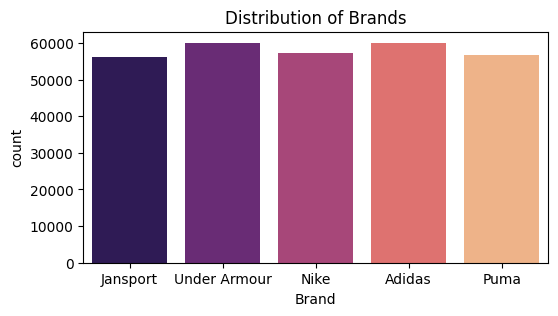

In [82]:
plt.figure(figsize=(6,3))      
plt.title("Distribution of Brands")      
sns.countplot(data = train_data,x='Brand',palette='magma',legend=False ,hue='Brand')      
plt.show()

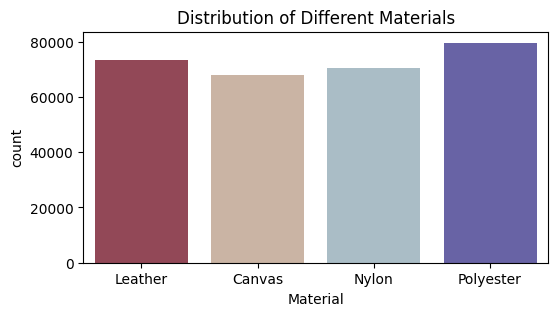

In [83]:
plt.figure(figsize=(6,3))      
plt.title("Distribution of Different Materials")      
sns.countplot(data = train_data ,x='Material',palette='twilight_shifted_r',legend=False,hue='Material')      
plt.show()

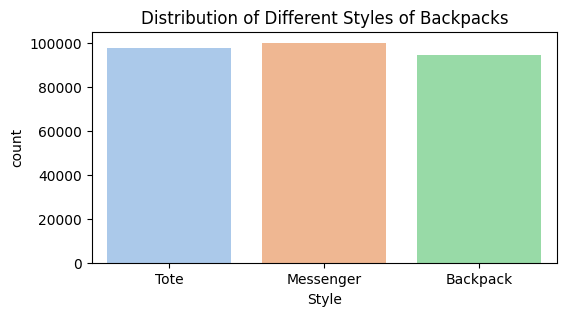

In [84]:
plt.figure(figsize=(6,3))      
plt.title("Distribution of Different Styles of Backpacks")      
sns.countplot(data = train_data ,x='Style' ,palette='pastel',legend=False,hue='Style')      
plt.show()

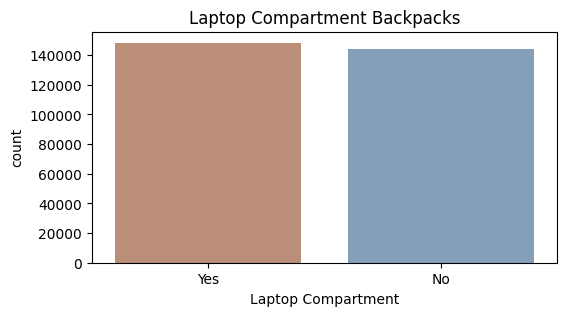

In [85]:
plt.figure(figsize=(6,3))      
plt.title("Laptop Compartment Backpacks")      
sns.countplot(data = train_data,x='Laptop Compartment',palette='twilight_shifted_r',legend=False,hue='Laptop Compartment')      
plt.show()

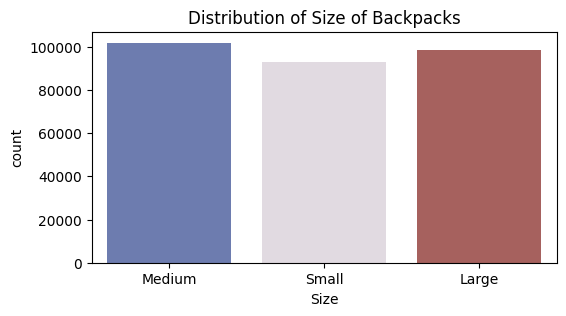

In [86]:
plt.figure(figsize=(6,3))      
plt.title("Distribution of Size of Backpacks")      
sns.countplot(data = train_data ,x='Size',palette='twilight_shifted',legend=False,hue='Size')      
plt.show()

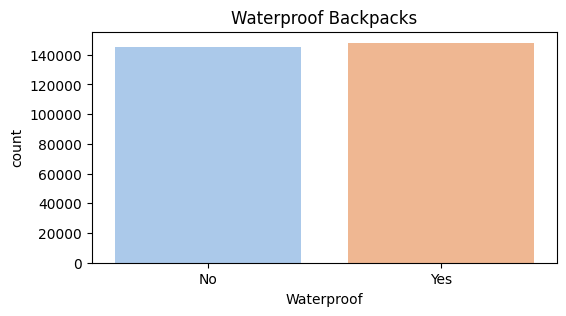

In [87]:
plt.figure(figsize=(6,3))      
plt.title("Waterproof Backpacks")      
sns.countplot(data = train_data ,x='Waterproof',palette='pastel',legend=False,hue='Waterproof')      
plt.show()

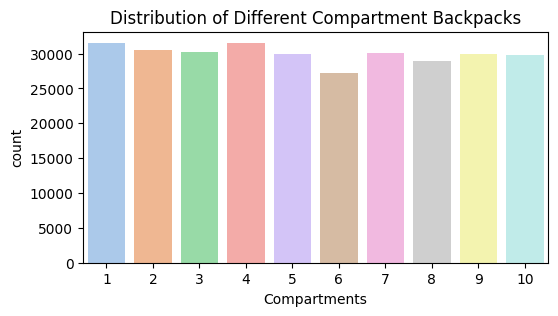

In [88]:
plt.figure(figsize=(6,3))      
plt.title("Distribution of Different Compartment Backpacks")      
sns.countplot(data = train_data,x='Compartments',legend =False,palette='pastel',hue='Compartments')      
plt.show()

In [89]:
numeric_col = train_data[['Weight Capacity (kg)','Price']]

In [90]:
for col in numeric_col.columns:      
    print("Skewness in the feature",col,' = ',numeric_col[col].skew())

Skewness in the feature Weight Capacity (kg)  =  -0.06423900616005432
Skewness in the feature Price  =  0.036882755131099065


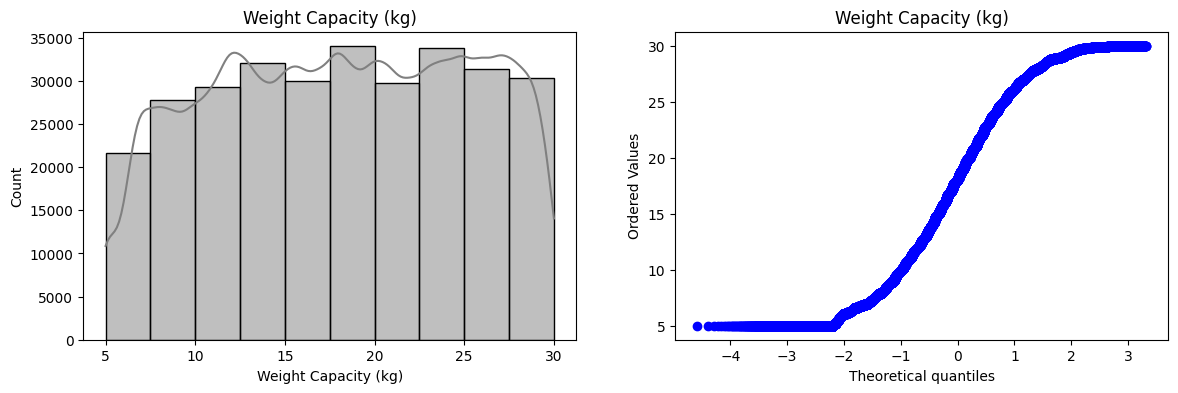

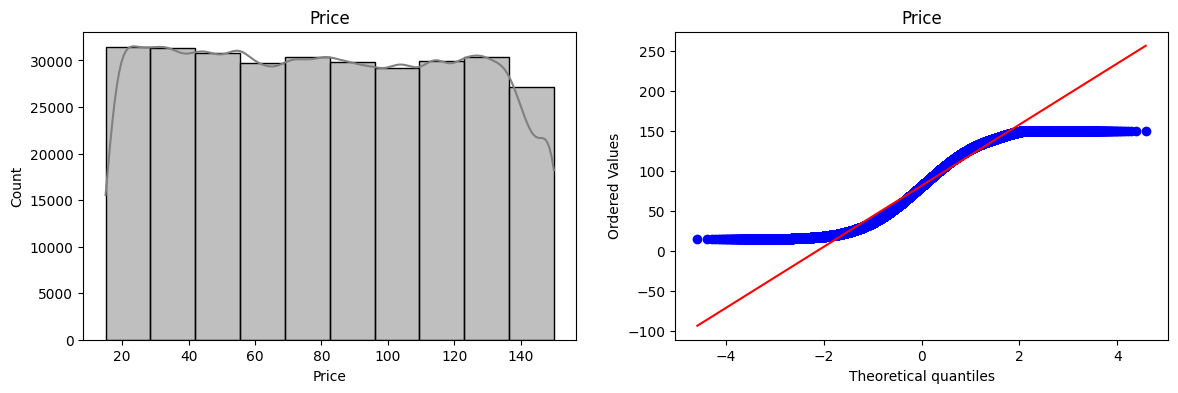

In [91]:
#Checking the distribution and how normal is the numeric features graphically      
for col in numeric_col.columns:      
    plt.figure(figsize=(14,4))      
    plt.subplot(121)      
    sns.histplot(numeric_col[col],bins=10,color='grey',kde = True)      
    plt.title(col)      
        
    plt.subplot(122)      
    stats.probplot(numeric_col[col],dist="norm" ,plot=plt)      
    plt.title(col)      

    plt.show()

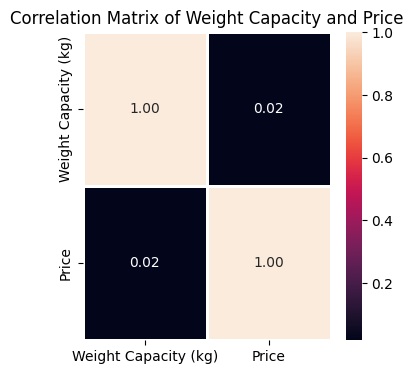

In [92]:
plt.figure(figsize=(4,4))      
plt.title('Correlation Matrix of Weight Capacity and Price')      
sns.heatmap(numeric_col.corr(),fmt='.2f',linewidths=2,annot=True)      
plt.show()

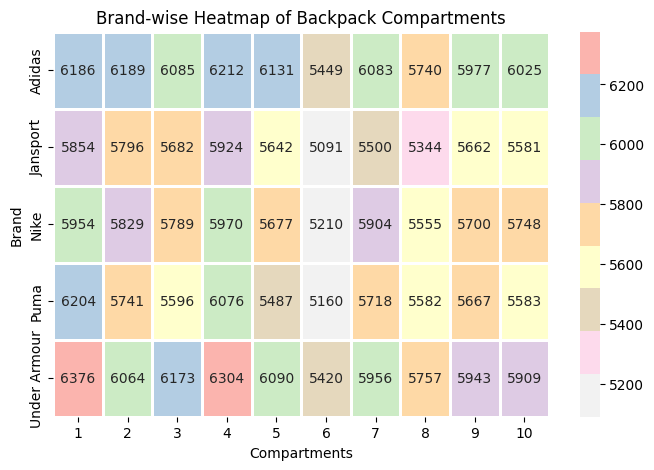

In [93]:
pivot_df = train_data.pivot_table(index='Brand',columns='Compartments',aggfunc='size',fill_value=0)      
plt.figure(figsize=(8,5))      
sns.heatmap(pivot_df,cmap='Pastel1_r',annot=True,fmt="d",linewidths=1)      
plt.xlabel("Compartments")      
plt.ylabel("Brand")      
plt.title("Brand-wise Heatmap of Backpack Compartments")      
plt.show()

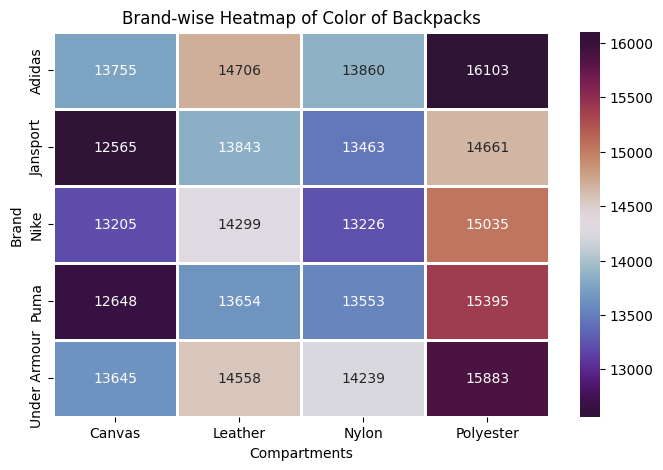

In [94]:
pivot_df = train_data.pivot_table(index='Brand',columns='Material',aggfunc='size',fill_value=0)      
plt.figure(figsize=(8,5))      
sns.heatmap(pivot_df,cmap='twilight_shifted',annot=True,fmt="d",linewidths=2)      
plt.xlabel("Compartments")      
plt.ylabel("Brand")      
plt.title("Brand-wise Heatmap of Color of Backpacks")      
plt.show()

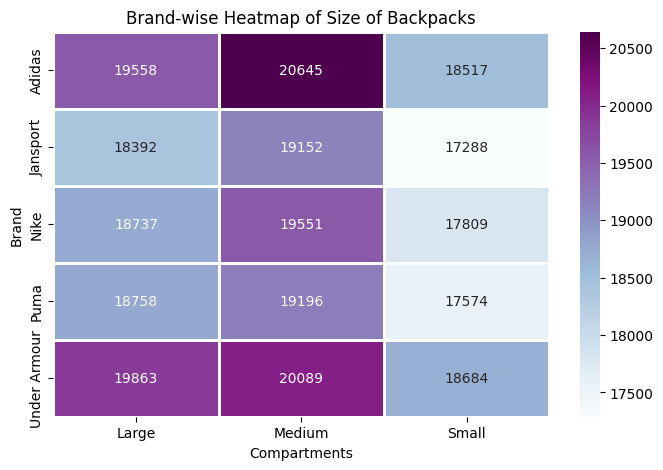

In [95]:
pivot_df = train_data.pivot_table(index='Brand',columns='Size',aggfunc='size',fill_value=0)      
plt.figure(figsize=(8,5))      
sns.heatmap(pivot_df,cmap='BuPu',annot=True,fmt="d" ,linewidths=2)      
plt.xlabel("Compartments")      
plt.ylabel("Brand")      
plt.title("Brand-wise Heatmap of Size of Backpacks")      
plt.show()

C:\Users\COBUY\AppData\Local\Temp\ipykernel_1056\1263879726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand',y='Weight Capacity (kg)',data=train_data,palette='viridis')


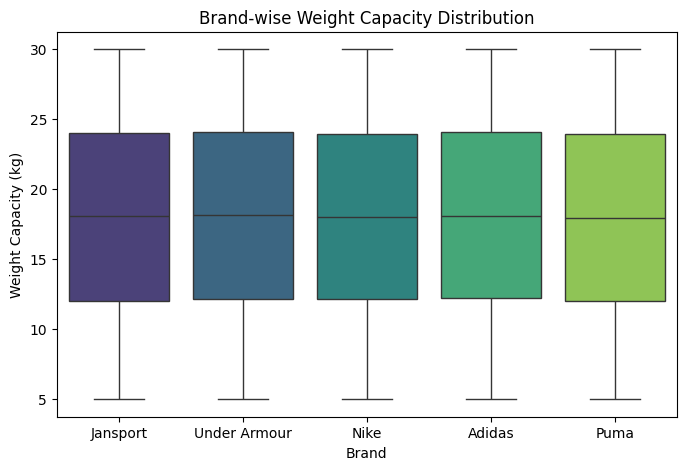

In [96]:
plt.figure(figsize=(8,5))      
sns.boxplot(x='Brand',y='Weight Capacity (kg)',data=train_data,palette='viridis')      
plt.xlabel('Brand')      
plt.ylabel('Weight Capacity (kg)')      
plt.title('Brand-wise Weight Capacity Distribution')      
plt.show()

In [97]:
brand_max_weight = train_data.groupby('Brand')['Weight Capacity (kg)'].max()      
brand_max_price = train_data.groupby('Brand')['Price'].max()      
    
Brand_summary = pd.concat([brand_max_weight,brand_max_price],axis=1)      
 
Brand_summary.columns = ['Max Weight Capacity (kg)','Max Price']      

print(Brand_summary)

              Max Weight Capacity (kg)  Max Price
Brand                                            
Adidas                            30.0      150.0
Jansport                          30.0      150.0
Nike                              30.0      150.0
Puma                              30.0      150.0
Under Armour                      30.0      150.0


In [98]:
material_avg_price = train_data.groupby('Material')['Price'].mean()      
material_avg_weight_capacity = train_data.groupby('Material')['Weight Capacity (kg)'].mean()      

material_summary = pd.concat([material_avg_weight_capacity,material_avg_price],axis=1)      

material_summary.columns = ['Avg Weight Capacity (kg)','Avg Price']      

print(material_summary)

           Avg Weight Capacity (kg)  Avg Price
Material                                      
Canvas                    17.895090  82.106511
Leather                   18.092483  80.437883
Nylon                     18.037784  81.024760
Polyester                 18.079334  82.033315


In [99]:
Compartment_avg_weight_capacity = train_data.groupby('Compartments')['Weight Capacity (kg)'].mean()      
Compartment_avg_price = train_data.groupby('Compartments')['Price'].mean()      

compartment_summary = pd.concat([Compartment_avg_weight_capacity,Compartment_avg_price],axis=1)      

compartment_summary.columns = ['Avg Weight Capacity (kg)','Avg Price']      

print(compartment_summary)


              Avg Weight Capacity (kg)  Avg Price
Compartments                                     
1                            18.044807  81.263845
2                            17.994845  81.171776
3                            17.908946  81.332909
4                            18.017422  81.969078
5                            17.988151  81.477310
6                            18.075753  81.452368
7                            18.201838  81.440569
8                            18.048827  81.906747
9                            18.087209  80.418818
10                           17.937214  81.685283


In [100]:
Laptop_Compartment_avg_weight_capacity = train_data.groupby('Laptop Compartment')['Weight Capacity (kg)'].mean()      
Laptop_Compartment_avg_price = train_data.groupby('Laptop Compartment')['Price'].mean()      

Laptop_compartment_summary = pd.concat([Laptop_Compartment_avg_weight_capacity,Laptop_Compartment_avg_price],axis=1)      

Laptop_compartment_summary.columns = ['Avg Weight Capacity (kg)','Avg Price']      

print(Laptop_compartment_summary)

                    Avg Weight Capacity (kg)  Avg Price
Laptop Compartment                                     
No                                 18.003843  81.464702
Yes                                18.040797  81.463842


In [101]:
Style_avg_weight_capacity = train_data.groupby('Style')['Weight Capacity (kg)'].mean()      
Style_avg_price = train_data.groupby('Style')['Price'].mean()      

Style_summary = pd.concat([Style_avg_weight_capacity,Style_avg_price],axis=1)      

Style_summary.columns = ['Avg Weight Capacity (kg)','Avg Price']      

print(Style_summary)

           Avg Weight Capacity (kg)  Avg Price
Style                                         
Backpack                  18.011741  81.402513
Messenger                 18.038890  81.410925
Tote                      18.043159  81.374865


In [102]:
Color_avg_weight_capacity = train_data.groupby('Color')['Weight Capacity (kg)'].mean()      
Color_avg_price = train_data.groupby('Color')['Price'].mean()      

Color_summary = pd.concat([Color_avg_weight_capacity,Color_avg_price],axis=1)      

Color_summary.columns = ['Avg Weight Capacity (kg)','Avg Price']      

print(Color_summary)

       Avg Weight Capacity (kg)  Avg Price
Color                                     
Black                 18.018805  80.513439
Blue                  18.023122  82.006994
Gray                  18.090706  80.851971
Green                 18.003425  82.381308
Pink                  18.016754  81.630864
Red                   18.039860  81.011644


In [103]:
Waterproof_avg_weight_capacity = train_data.groupby('Waterproof')['Weight Capacity (kg)'].mean()      
Waterproof_avg_price = train_data.groupby('Waterproof')['Price'].mean()      
 
Waterproof_summary = pd.concat([Waterproof_avg_weight_capacity,Waterproof_avg_price],axis=1)      

Waterproof_summary.columns = ['Avg Weight Capacity (kg)','Avg Price']      

print(Waterproof_summary)

            Avg Weight Capacity (kg)  Avg Price
Waterproof                                     
No                         17.997063  81.572050
Yes                        18.048459  81.403489


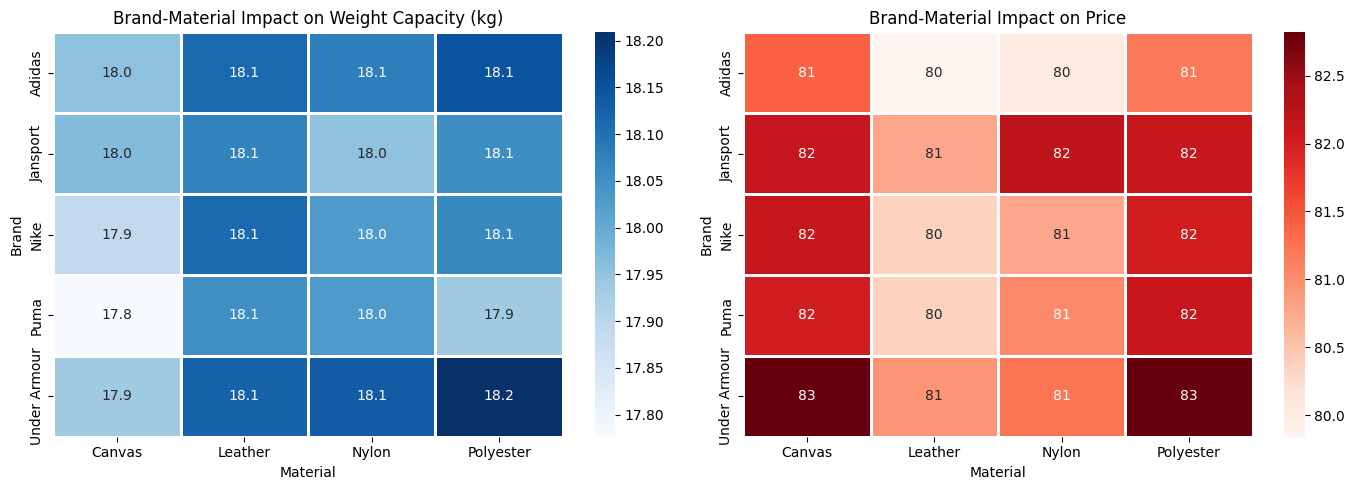

In [104]:
brand_material_summary = train_data.groupby(['Brand', 'Material'])[['Weight Capacity (kg)', 'Price']].mean().reset_index()

# Fix column names in pivot
heatmap_data_weight = brand_material_summary.pivot(index="Brand", columns="Material", values="Weight Capacity (kg)")
heatmap_data_price = brand_material_summary.pivot(index="Brand", columns="Material", values="Price")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap for Weight Capacity
sns.heatmap(heatmap_data_weight, cmap="Blues", annot=True, fmt=".1f", ax=axes[0], linewidths=2)
axes[0].set_title("Brand-Material Impact on Weight Capacity (kg)")

# Heatmap for Price
sns.heatmap(heatmap_data_price, cmap="Reds", annot=True, fmt=".0f", ax=axes[1], linewidths=2)
axes[1].set_title("Brand-Material Impact on Price")

plt.tight_layout()
plt.show()

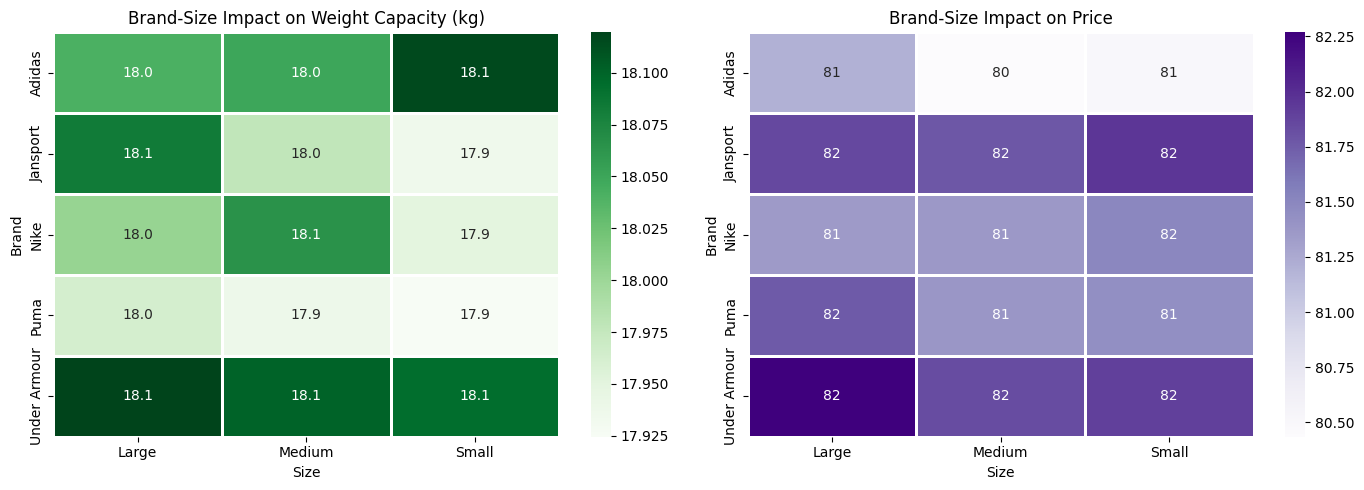

In [105]:
brand_Size_summary = train_data.groupby(['Brand', 'Size'])[['Weight Capacity (kg)', 'Price']].mean().reset_index()

# Fix column names in pivot
heatmap_data_weight = brand_Size_summary.pivot(index="Brand", columns="Size", values="Weight Capacity (kg)")
heatmap_data_price = brand_Size_summary.pivot(index="Brand", columns="Size", values="Price")

# Create subplots for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap for Weight Capacity (Using Greens)
sns.heatmap(heatmap_data_weight, cmap="Greens", annot=True, fmt=".1f", ax=axes[0], linewidths=2)
axes[0].set_title("Brand-Size Impact on Weight Capacity (kg)")

# Heatmap for Price (Using Purples)
sns.heatmap(heatmap_data_price, cmap="Purples", annot=True, fmt=".0f", ax=axes[1], linewidths=2)
axes[1].set_title("Brand-Size Impact on Price")

plt.tight_layout()
plt.show()

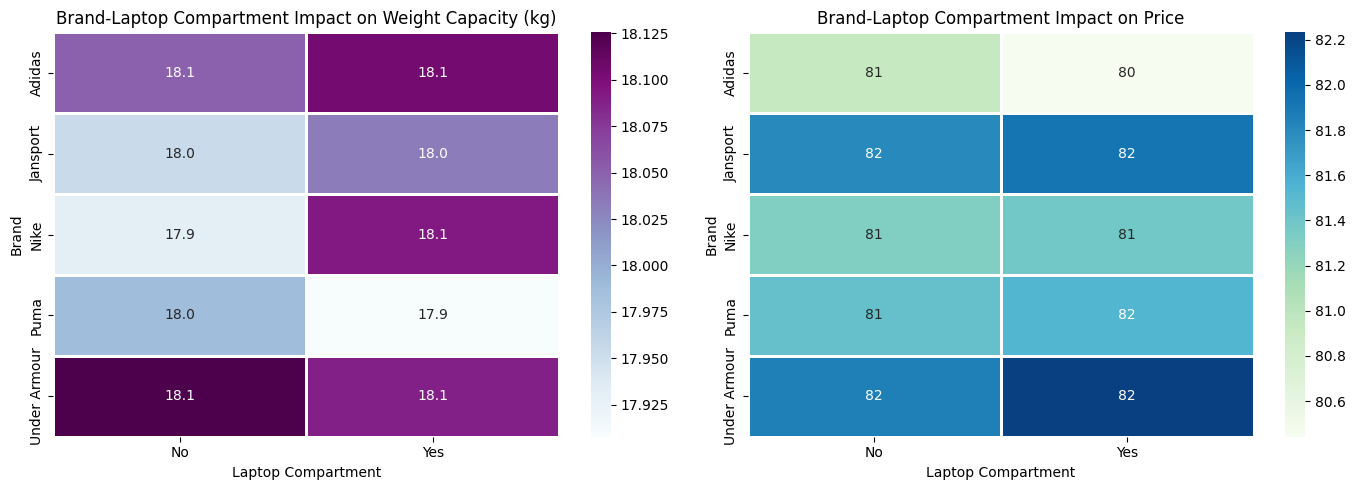

In [106]:
brand_Laptop_compartment_summary = train_data.groupby(['Brand', 'Laptop Compartment'])[['Weight Capacity (kg)', 'Price']].mean().reset_index()

# Fix column names in pivot
heatmap_data_weight = brand_Laptop_compartment_summary.pivot(index="Brand", columns="Laptop Compartment", values="Weight Capacity (kg)")
heatmap_data_price = brand_Laptop_compartment_summary.pivot(index="Brand", columns="Laptop Compartment", values="Price")

# Create subplots for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap for Weight Capacity (Using BuPu colormap)
sns.heatmap(heatmap_data_weight, cmap="BuPu", annot=True, fmt=".1f", ax=axes[0], linewidths=2)
axes[0].set_title("Brand-Laptop Compartment Impact on Weight Capacity (kg)")

# Heatmap for Price (Using GnBu colormap)
sns.heatmap(heatmap_data_price, cmap="GnBu", annot=True, fmt=".0f", ax=axes[1], linewidths=2)
axes[1].set_title("Brand-Laptop Compartment Impact on Price")

plt.tight_layout()
plt.show()

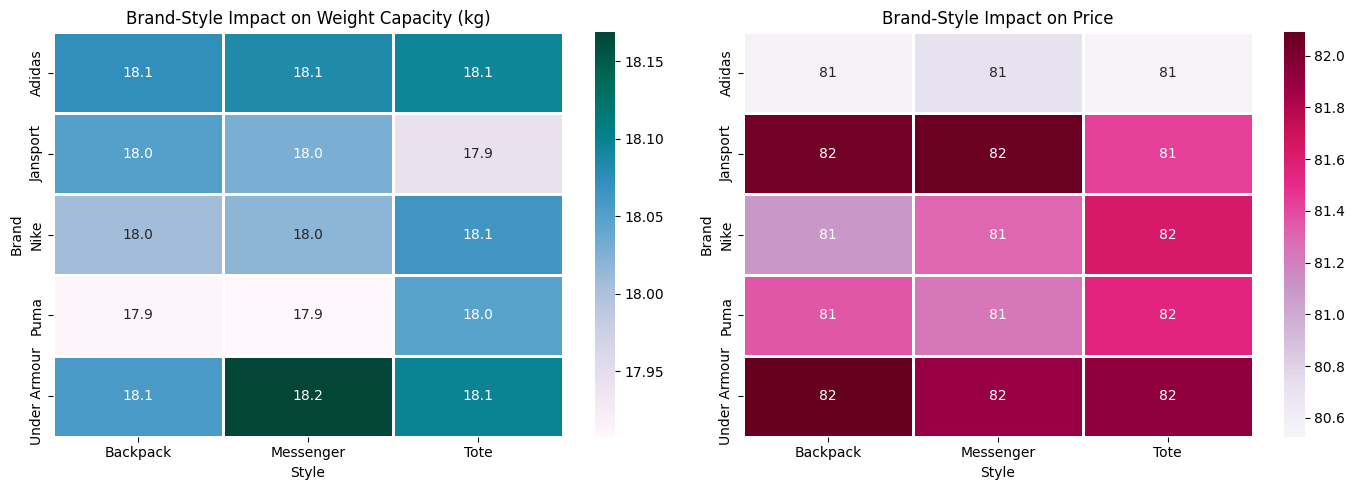

In [107]:
brand_Style_summary = train_data.groupby(['Brand', 'Style'])[['Weight Capacity (kg)', 'Price']].mean().reset_index()

# Fix column names in pivot
heatmap_data_weight = brand_Style_summary.pivot(index="Brand", columns="Style", values="Weight Capacity (kg)")
heatmap_data_price = brand_Style_summary.pivot(index="Brand", columns="Style", values="Price")

# Create subplots for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap for Weight Capacity (Using PuBuGn colormap)
sns.heatmap(heatmap_data_weight, cmap="PuBuGn", annot=True, fmt=".1f", ax=axes[0], linewidths=2)
axes[0].set_title("Brand-Style Impact on Weight Capacity (kg)")

# Heatmap for Price (Using PuRd colormap)
sns.heatmap(heatmap_data_price, cmap="PuRd", annot=True, fmt=".0f", ax=axes[1], linewidths=2)
axes[1].set_title("Brand-Style Impact on Price")

plt.tight_layout()
plt.show()

In [108]:
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1,Yes,Yes,Messenger,Green,17.749338,86.02312


Feature Engneering


In [109]:
train_data.drop(columns='id',axis=1,inplace=True)

In [110]:
train_data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1,Yes,Yes,Messenger,Green,17.749338,86.02312


In [111]:
target = train_data["Price"]
train_data.drop(columns='Price',axis=1,inplace=True)

In [112]:
train_data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Jansport,Leather,Medium,7,Yes,No,Tote,Black,11.611723
1,Jansport,Canvas,Small,10,Yes,Yes,Messenger,Green,27.078537
2,Under Armour,Leather,Small,2,Yes,No,Messenger,Red,16.643760
3,Nike,Nylon,Small,8,Yes,No,Messenger,Green,12.937220
4,Adidas,Canvas,Medium,1,Yes,Yes,Messenger,Green,17.749338


In [113]:
target.head()

0    112.15875
1     68.88056
2     39.17320
3     80.60793
4     86.02312
Name: Price, dtype: float64

In [114]:
#Numerical Imputation
numeric_processor = Pipeline(
    steps=[("imputation_median",SimpleImputer(missing_values=np.nan,strategy="median")),
           ("scaler",StandardScaler())]
)
numeric_processor

Pipeline(steps=[('imputation_median', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [116]:
#categorical processing
Categorical_processor = ColumnTransformer(
    transformers=[
        ("Onehot", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), ["Brand", "Material", "Style", "Color"]),
        
        ("Ordinal", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ordinal", OrdinalEncoder())
        ]), ["Size"]),
        
        ("Binary", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ordinal", OrdinalEncoder())  # Used instead of LabelEncoder
        ]), ["Laptop Compartment", "Waterproof"])
    ]
)
Categorical_processor

ColumnTransformer(transformers=[('Onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Brand', 'Material', 'Style', 'Color']),
                                ('Ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Size']),
                                ('Binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Laptop Compartment', 'Waterproof'])])

In [121]:
Preprocessor=ColumnTransformer(
    [("Categorical",Categorical_processor,["Brand","Material","Size","Laptop Compartment","Waterproof","Style","Color"]),
     ("Numerical",numeric_processor,["Compartments","Weight Capacity (kg)"])]
)
Preprocessor

ColumnTransformer(transformers=[('Categorical',
                                 ColumnTransformer(transformers=[('Onehot',
                                                                  Pipeline(steps=[('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('onehot',
                                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                                  ['Brand',
                                                                   'Material',
                                                                   'Style',
                                                                   'Color']),
                                                                 ('Ordinal',
                                                                  Pipeline(steps=[('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('ordinal',
                                                                                   OrdinalEncode...
                                                                  Pipeline(steps=[('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('ordinal',
                                                                                   OrdinalEncoder())]),
                                                                  ['Laptop '
                                                                   'Compartment',
                                                                   'Waterproof'])]),
                                 ['Brand', 'Material', 'Size',
                                  'Laptop Compartment', 'Waterproof', 'Style',
                                  'Color']),
                                ('Numerical',
                                 Pipeline(steps=[('imputation_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Compartments', 'Weight Capacity (kg)'])])

In [122]:
pipe = make_pipeline(Preprocessor,LinearRegression())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  ColumnTransformer(transformers=[('Onehot',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('onehot',
                                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                                   ['Brand',
                                                                                    'Material',
                                                                                    'Style',
                                                                                    'Color']),
                                                                                  ('Ordinal',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most...
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('ordinal',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['Laptop '
                                                                                    'Compartment',
                                                                                    'Waterproof'])]),
                                                  ['Brand', 'Material', 'Size',
                                                   'Laptop Compartment',
                                                   'Waterproof', 'Style',
                                                   'Color']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Compartments',
                                                   'Weight Capacity (kg)'])])),
                ('linearregression', LinearRegression())])

In [123]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data,target,test_size=0.33, random_state=42
)

In [124]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  ColumnTransformer(transformers=[('Onehot',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('onehot',
                                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                                   ['Brand',
                                                                                    'Material',
                                                                                    'Style',
                                                                                    'Color']),
                                                                                  ('Ordinal',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most...
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('ordinal',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['Laptop '
                                                                                    'Compartment',
                                                                                    'Waterproof'])]),
                                                  ['Brand', 'Material', 'Size',
                                                   'Laptop Compartment',
                                                   'Waterproof', 'Style',
                                                   'Color']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Compartments',
                                                   'Weight Capacity (kg)'])])),
                ('linearregression', LinearRegression())])

In [125]:
y_pred = pipe.predict(x_test)

In [132]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)


In [133]:
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Root Mean Squared Error: 38.97727733220828
Mean Squared Error: 1519.2281482318774
Mean Absolute Error: 33.72943153500474
R² Score: 0.001044637340069654


Making Predictions on the Test Dataset 

In [139]:
test = pd.read_csv("test.csv")

In [140]:
test_data = test.drop(columns="id",axis=1)

In [141]:
test_pred = pipe.predict(test_data)

In [142]:
submission = pd.DataFrame({
    "Id": test["id"],  # Use unique identifier if available, else use index
    "Predicted": test_pred
})

# Save predictions to CSV
submission.to_csv("submission.csv", index=False)